# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [59]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [60]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return x**2*(numpy.sin(x))

Ensure your function works with numpy arrays:

In [61]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [62]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x*(numpy.sin(x)))-((x**2-2)*(numpy.cos(x)))-2

Check your solution with the same numpy array:

In [63]:
assert g(0) == 0.

In [64]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [65]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax)-g(xmin)

Check your analytic function:

In [66]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [67]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    even_values = 0
    odd_values = 0
    h = (xmax-xmin)/(N)
    first = (h/6)*(f(xmin) + f(xmax))
    for i in range (1,N+1):
        m = xmin + (h/2)*(2*i-1)
        s = 4*f(m)
        even_values += s
    for i in range (1,N):
        p = xmin + (h/2)*(2*i)
        q = 2*f(p)
        odd_values += q
    return first + (h/6)*(even_values+odd_values) 

Make sure you have implemented Simpson's rule correctly:

In [68]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [69]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


[ -8.74724655 -11.53398791 -14.31010553 -17.08357589 -19.85638491
 -22.62902794 -25.40165101 -28.17310554 -30.94074282]
[1.38629436 2.07944154 2.77258872 3.4657359  4.15888308 4.85203026
 5.54517744 6.23832463 6.93147181]


Text(0.5,1,'Fractional error as the number of panels is varied')

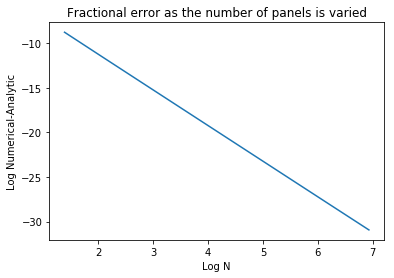

In [81]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
log_panel = numpy.array([])
log_numeric_array = numpy.array([])
log_analytic_array = numpy.array([])
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024])# Panel numbers to use
for i in range (0,len(panel_counts)):
    
    log_panel = numpy.append (log_panel, numpy.log(panel_counts[i]))
    log_numeric_array = numpy.append (log_numeric_array, integrate_numeric(x0, x1, panel_counts[i]))
    log_analytic_array = numpy.append (log_analytic_array, integrate_analytic(x0, x1))
    
log_difference = numpy.log(1 - (log_numeric_array/log_analytic_array))
    
print(log_difference)
print(log_panel)
plt.plot (log_panel , log_difference)
plt.xlabel ('Log N')
plt.ylabel ('Log Numerical-Analytic')
plt.title ('Fractional error as the number of panels is varied')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

YOUR ANSWER HERE
Increasing the number of panels, decreases the error, however if N becomes too large, the error begins to fluctuate and generally increase again.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

YOUR ANSWER HERE
If the trapezium rule was being used, the error on the value would scale with N^-2.